In [113]:
import cv2
import pytesseract
import random
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
%matplotlib inline

def plot_images(img1, img2 = None, title1="", title2=""):
    fig = plt.figure(figsize=[30,30])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)
    
def printmd(string):
    display(Markdown(string))

print("CV2", cv2.__version__)
print("Tesseract", pytesseract.get_tesseract_version())


('CV2', '4.2.0')
('Tesseract', LooseVersion ('4.0.0'))


In [2]:
raw = cv2.imread("./sample-plate.png")
image = cv2.cvtColor(raw, cv2.COLOR_BGR2RGB)

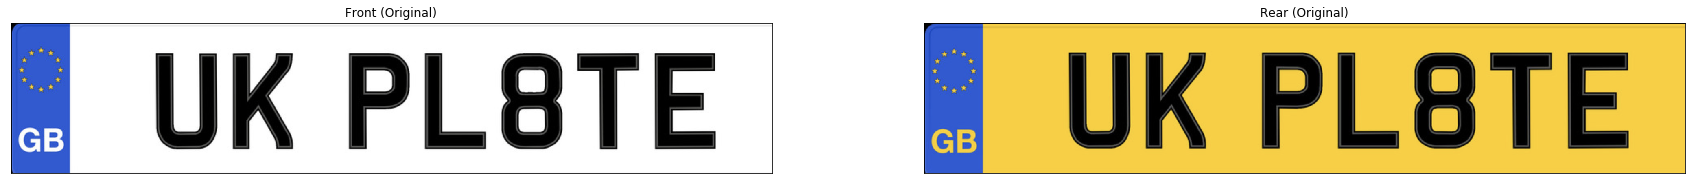

In [3]:

front = image[30:400, 30:1900]
rear = image[600:970, 30:1900]
plot_images(front, rear, "Front (Original)", "Rear (Original)")

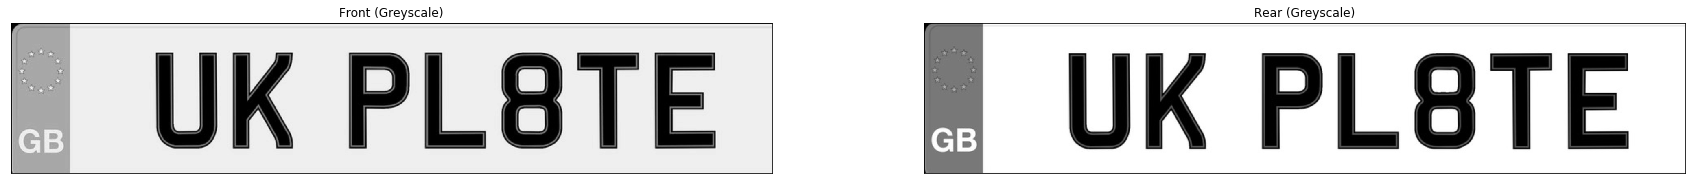

In [4]:
front_gray = cv2.cvtColor(front, cv2.COLOR_BGR2GRAY)
rear_gray = cv2.cvtColor(rear, cv2.COLOR_BGR2GRAY)
plot_images(rear_gray, front_gray, "Front (Greyscale)", "Rear (Greyscale)")

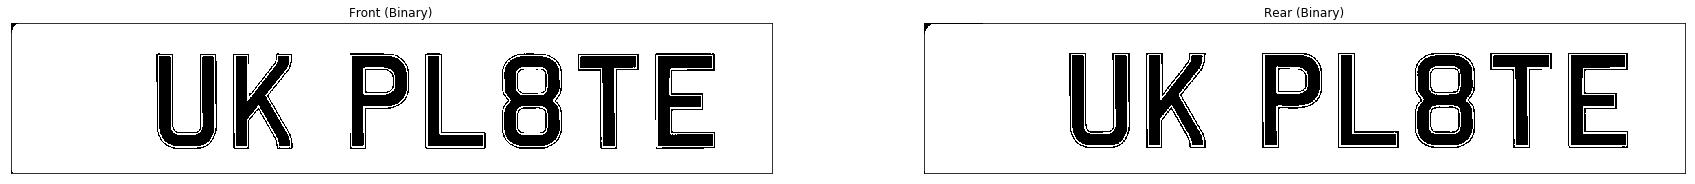

In [5]:
ret, front_mask = cv2.threshold(front_gray, 50, 255, cv2.THRESH_BINARY)
ret, rear_mask = cv2.threshold(rear_gray, 50, 255, cv2.THRESH_BINARY)

plot_images(front_mask, rear_mask, "Front (Binary)", "Rear (Binary)")

### Extract Text Boundary

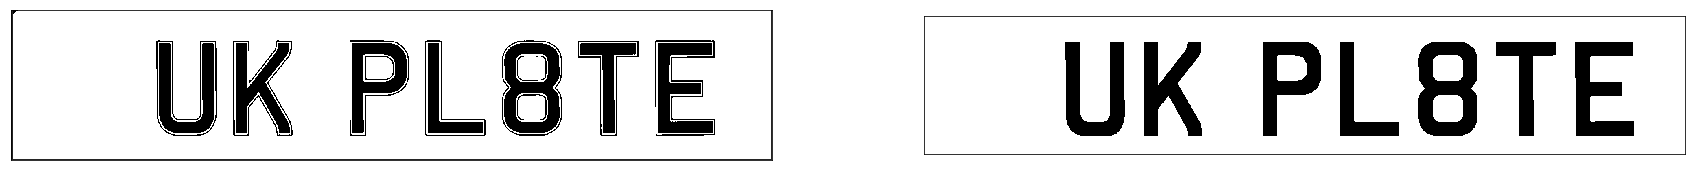

In [105]:
front_contours = front_mask[20:-20, 20:-20].copy()

front_contours = cv2.dilate(front_contours,None,iterations = 2)
front_contours = cv2.erode(front_contours,None,iterations = 5)
        
plot_images(front_mask, front_contours)

In [103]:
rear_value = pytesseract.image_to_string(rear_mask, config='-l eng --psm 6 -c tessedit_char_whitelist=0123456789ABCDEFGHJKLMNOPQRSTUVWXYZ')
front_value = pytesseract.image_to_string(front_contours, config='-l eng --psm 6 -c tessedit_char_whitelist=0123456789ABCDEFGHJKLMNOPQRSTUVWXYZ')
printmd("### Front -> " + rear_value)
printmd("### Rear -> " + front_value)

### Front -> UK PL8TE

### Rear -> UK PL8TE